In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
import sympy
import glob

plt.style.use('seaborn-ticks')

/tmp/ipykernel_8725/1772612712.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


In [2]:
def model(x, a, b):
    return a*x+b

/tmp/ipykernel_8725/193148519.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ms_array= np.array([float(i) for i in ms_s])
/tmp/ipykernel_8725/193148519.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sfr_array= np.array([float(i) for i in sfr_s])
/tmp/ipykernel_8725/193148519.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ms_array= np.array([float(i) for i in ms_g])
/tmp/ipykernel_8725/193148519.py:52: DeprecationWarning: Conversion of an array wit

Text(0.5, 0.98, 'SFR vs Stellar Mass')

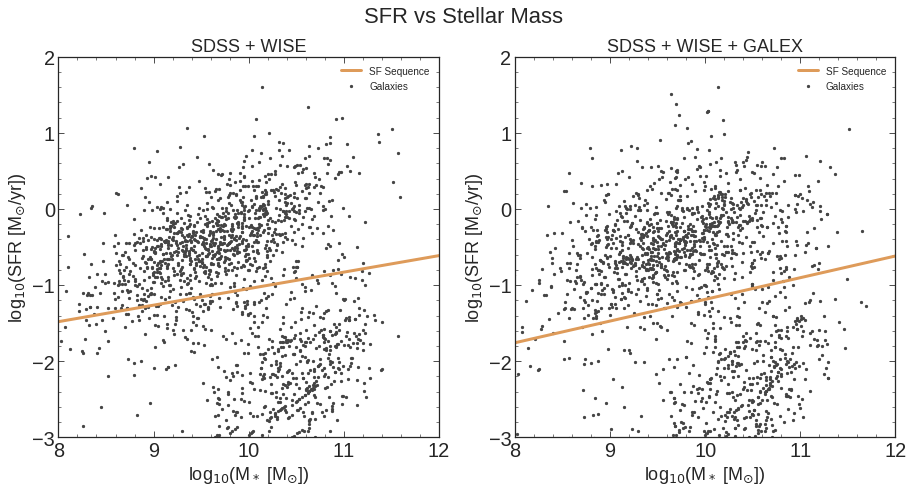

In [12]:
SDSS= glob.glob('/home/pablet/Downloads/MAGPHYS/magphys/DATA_2/SDSS/fit/*.fit')
GALEX= glob.glob('/home/pablet/Downloads/MAGPHYS/magphys/DATA_2/GALEX/fit/*.fit')


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,7))

#SDSS + WISE
ms_s= []
sfr_s= []
for i in SDSS:
    data_fit= ascii.read(i, data_start=3, data_end=4)
    MS= data_fit['col6']
    SFR= data_fit['col16']
    ms_s.append(np.log10(MS))
    sfr_s.append(np.log10(SFR))

ms_mx= sympy.Matrix(ms_s)
sfr_mx= sympy.Matrix(sfr_s)
ms_array= np.array([float(i) for i in ms_s])
sfr_array= np.array([float(i) for i in sfr_s])

ans, cov= curve_fit(model, ms_array, sfr_array)
fit_a, fit_b= ans
ms_fit= np.linspace(min(ms_array), 13, 2)

ax1.plot(ms_fit, model(ms_fit, fit_a, fit_b), lw=3, color='#de9b5a', label='SF Sequence')
ax1.scatter(ms_s, sfr_s, s=5, c='#444444', label='Galaxies')
ax1.set_ylabel('log$_{10}$(SFR [M$_{\odot}$/yr])', fontsize=18)
ax1.set_xlabel('log$_{10}$(M$_*$ [M$_{\odot}$])', fontsize=18)
ax1.set_title('SDSS + WISE', fontsize=18)
ax1.set_xlim(8, 12)
ax1.set_ylim(-3, 2)
ax1.set_xticks([8,9,10,11,12])
ax1.set_yticks([-3,-2,-1,0,1,2])
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', labelsize=20, top=True, right=True)
ax1.legend(loc='best')

#GALEX
ms_g= []
sfr_g= []
for i in GALEX:
    data_fit= ascii.read(i, data_start=3, data_end=4)
    MS= data_fit['col6']
    SFR= data_fit['col16']
    ms_g.append(np.log10(MS))
    sfr_g.append(np.log10(SFR))

ms_mx= sympy.Matrix(ms_g)
sfr_mx= sympy.Matrix(sfr_g)
ms_array= np.array([float(i) for i in ms_g])
sfr_array= np.array([float(i) for i in sfr_g])

ans, cov= curve_fit(model, ms_array, sfr_array)
fit_a, fit_b= ans
ms_fit= np.linspace(min(ms_array), 13, 2)

ax2.plot(ms_fit, model(ms_fit, fit_a, fit_b), lw=3, color='#de9b5a', label='SF Sequence')
ax2.scatter(ms_g, sfr_g, s=5, c='#444444', label='Galaxies')
ax2.set_ylabel('log$_{10}$(SFR [M$_{\odot}$/yr])', fontsize=18)
ax2.set_xlabel('log$_{10}$(M$_*$ [M$_{\odot}$])', fontsize=18)
ax2.set_title('SDSS + WISE + GALEX', fontsize=18)
ax2.set_xlim(8, 12)
ax2.set_ylim(-3, 2)
ax2.set_xticks([8,9,10,11,12])
ax2.set_yticks([-3,-2,-1,0,1,2])
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', labelsize=20, top=True, right=True)
ax2.legend(loc='best')

plt.suptitle('SFR vs Stellar Mass', fontsize=22)
